## Exploring tweets containing word "brexit" in days just before and just after Brexit vote

June 21 - June 30, 2016

This data set is quite small at only ~10,000 tweets, so it is much harder to find semantically interesting results than with charisma dataset. Still may be useful info for people interested specifically in Brexit

In [4]:
import sys
sys.path.append('..')

from twords.twords import Twords 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
# this pandas line makes the dataframe display all text in a line; useful for seeing entire tweets
pd.set_option('display.max_colwidth', -1)

In [5]:
twit = Twords()
twit.data_path = "../data/java_collector/brexit"
twit.background_path = '../jar_files_and_background/freq_table_72319443_total_words_twitter_corpus.csv'
twit.create_Background_dict()
twit.set_Search_terms(["brexit"])
twit.create_Stop_words()

In [6]:
twit.get_java_tweets_from_csv_list()

In [7]:
# find how many tweets we have in original dataset
print "Total number of tweets:", len(twit.tweets_df)

Total number of tweets: 9970


# Standard cleaning

In [8]:
twit.lower_tweets()

In [9]:
twit.keep_only_unicode_tweet_text()

In [10]:
twit.remove_urls_from_tweets()

Removing urls from tweets...
This may take a minute - cleaning rate is about 400,000 tweets per minute
Time to complete: 0.037 minutes
Tweets cleaned per minute: 270955.8


In [11]:
twit.convert_tweet_dates_to_standard()

In [12]:
twit.sort_tweets_by_date()

In [13]:
twit.drop_duplicates_in_text()

In [14]:
twit.drop_by_search_in_name()

In [15]:
len(twit.tweets_df)

8931

In [16]:
twit.keep_tweets_with_terms("brexit")

In [17]:
len(twit.tweets_df)

8180

# Create word_freq_df

In [18]:
twit.create_word_bag()
twit.make_nltk_object_from_word_bag()
twit.create_word_freq_df(1000)

Time to make words_string:  0.0 minutes
Time to tokenize:  0.04 minutes
Time to compute word bag:  0.014 minutes
Creating word_freq_df...
Takes about 1 minute per 1000 words
Time to create word_freq_df:  0.4076 minutes


In [20]:
twit.word_freq_df.sort_values("log relative frequency", ascending = False, inplace = True)
twit.word_freq_df.head(20)

,word,occurrences,frequency,relative frequency,log relative frequency,background_occur
102,unido,66,0.000805,6472.012374,8.775242,9
104,reino,65,0.000793,6373.951581,8.759975,9
107,tras,64,0.000781,3530.188568,8.169107,16
256,“brexit”,36,0.000439,2647.641426,7.881424,12
255,qué,36,0.000439,2269.406936,7.727274,14
269,más,35,0.000427,1930.571873,7.565572,16
282,europea,34,0.000415,1875.412677,7.536584,16
625,jatuh,17,0.000207,1875.412677,7.536584,8
781,entender,14,0.000171,1544.457498,7.342428,8
352,inggris,28,0.000342,1544.457498,7.342428,16


# Plot results with varying background cutoffs

## At least 100 background occurrences:

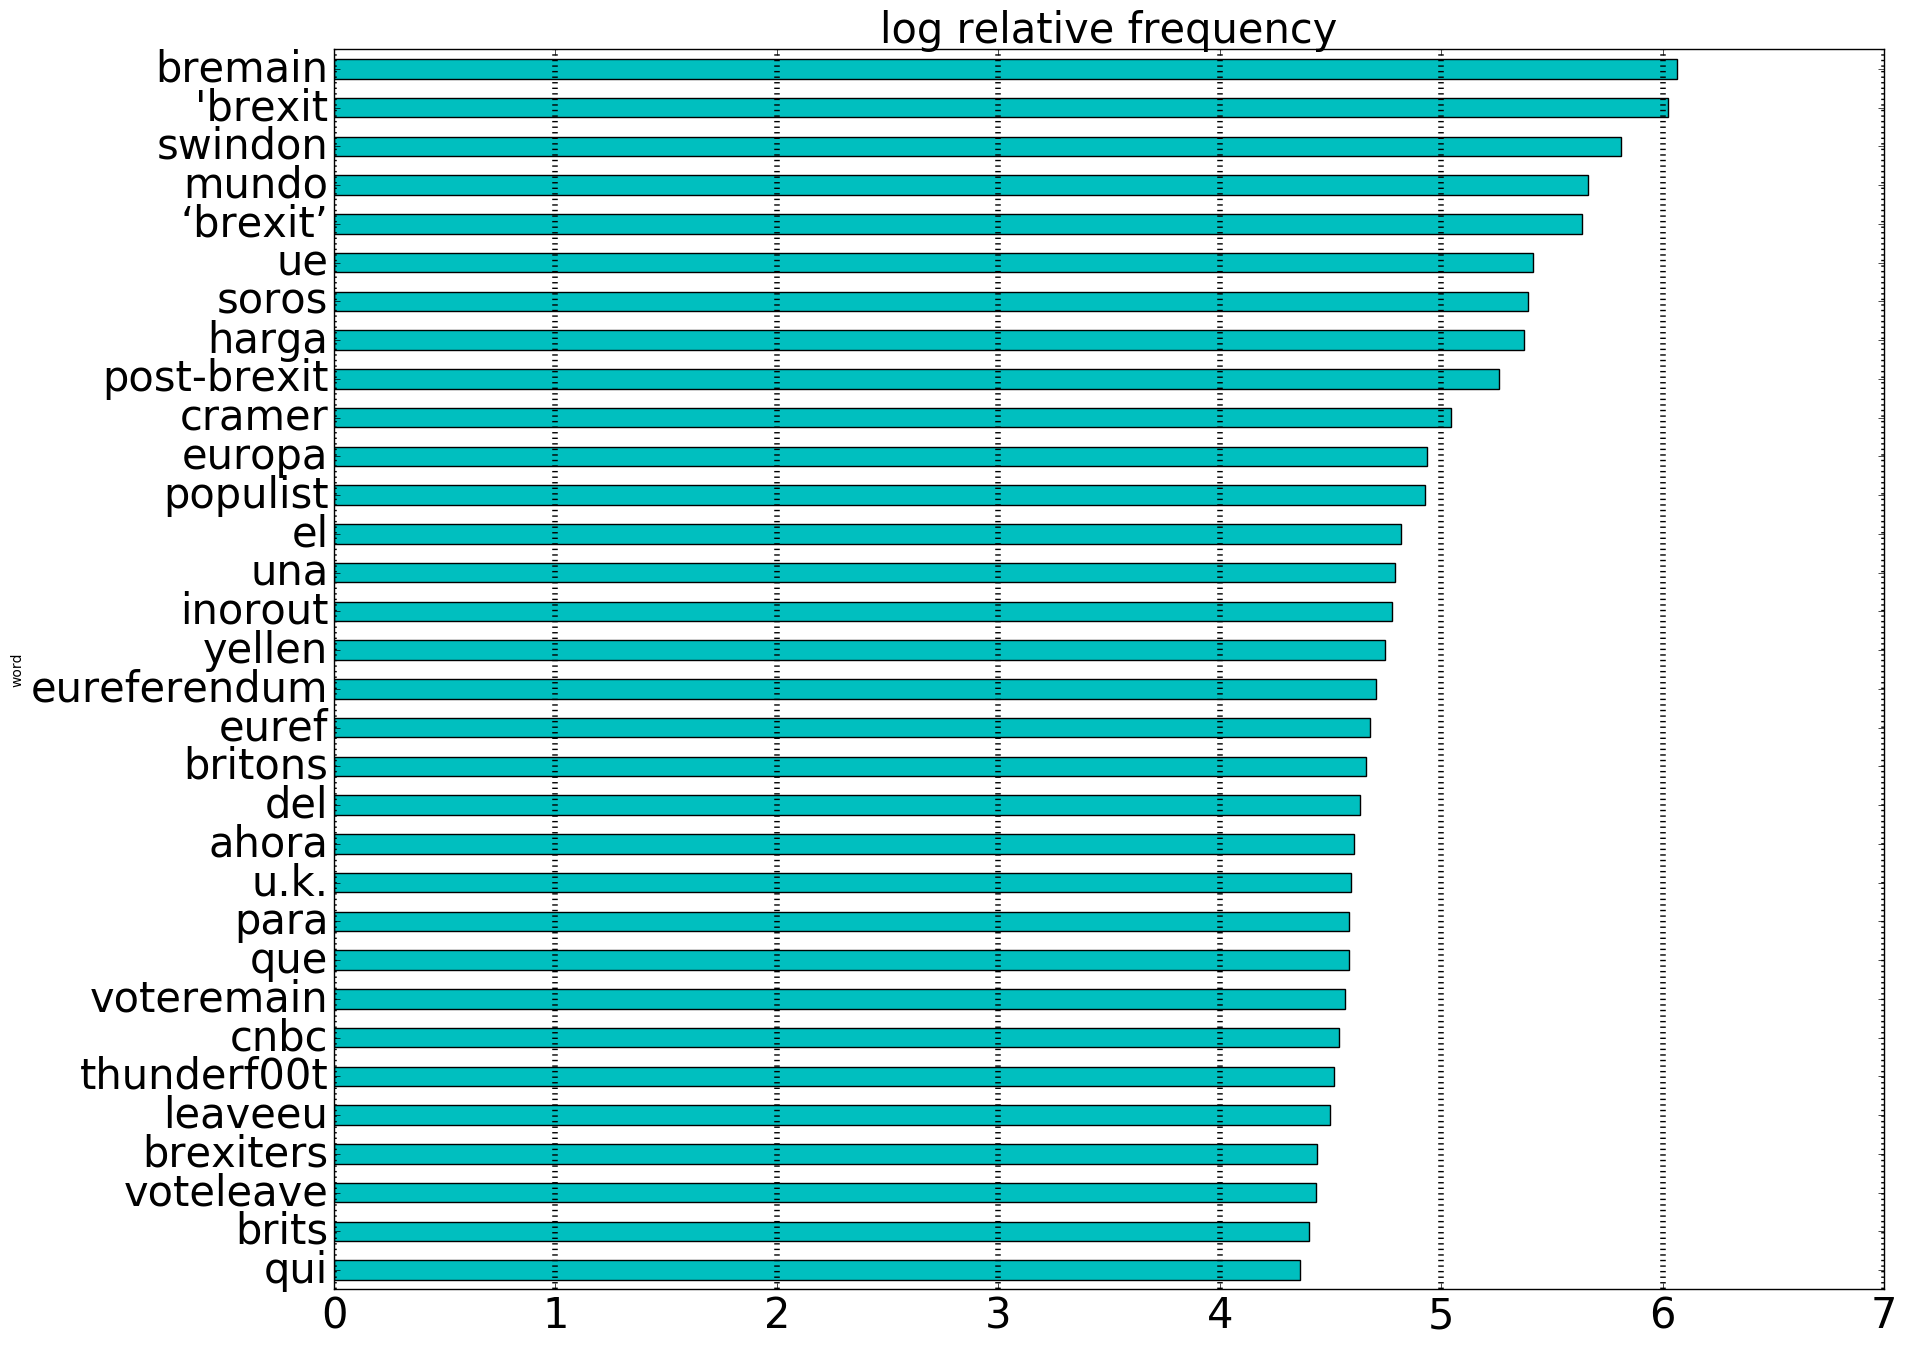

In [28]:
num_words_to_plot = 32
background_cutoff = 100
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## At least 500 background occurrences:

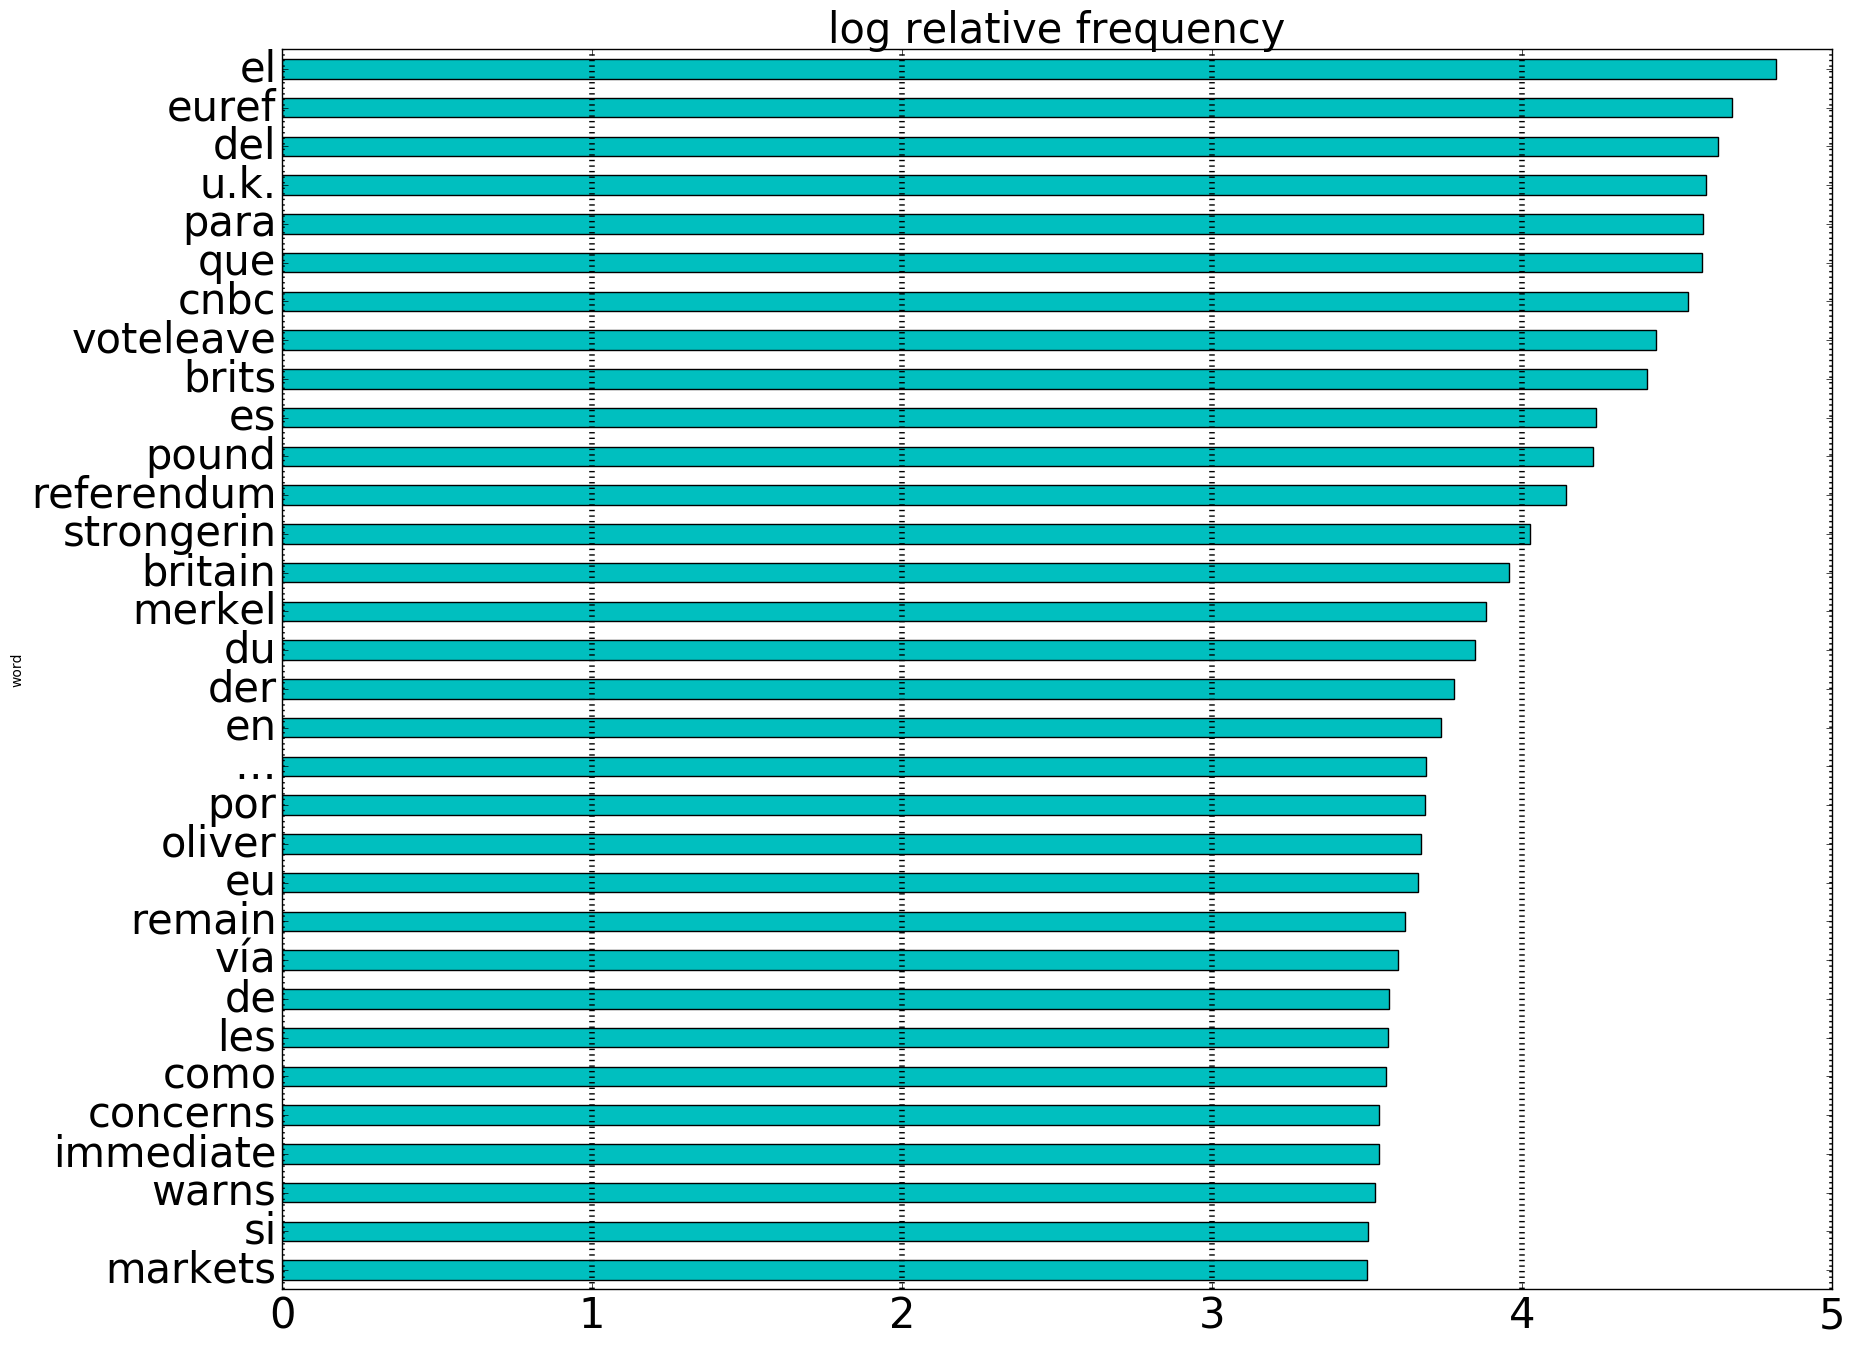

In [29]:
num_words_to_plot = 32
background_cutoff = 500
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

# At least 2000 background occurrences: 

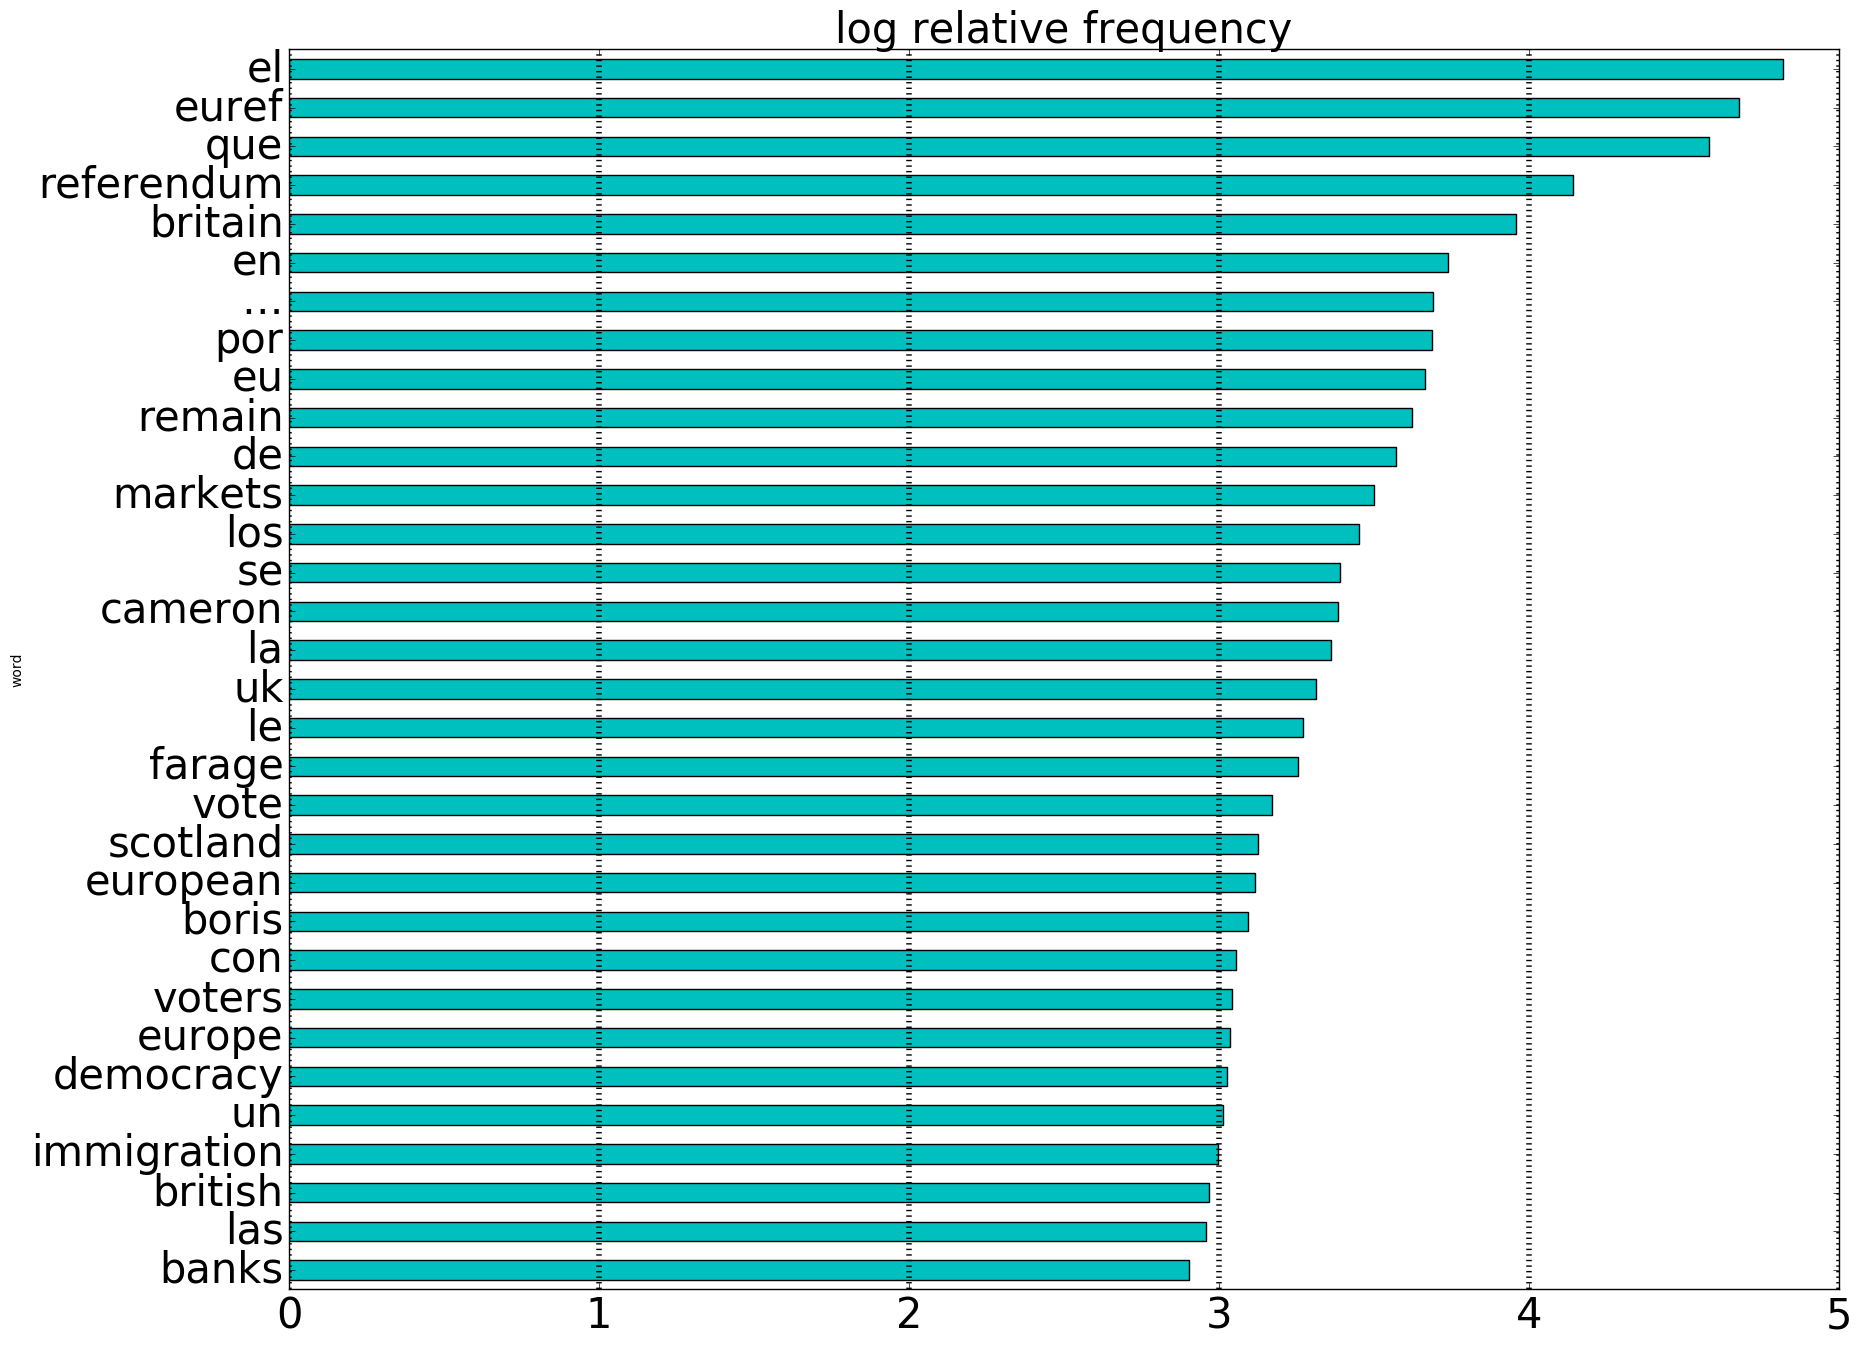

In [42]:
num_words_to_plot = 32
background_cutoff = 2000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);

## At least 10,000 background occurrences: 

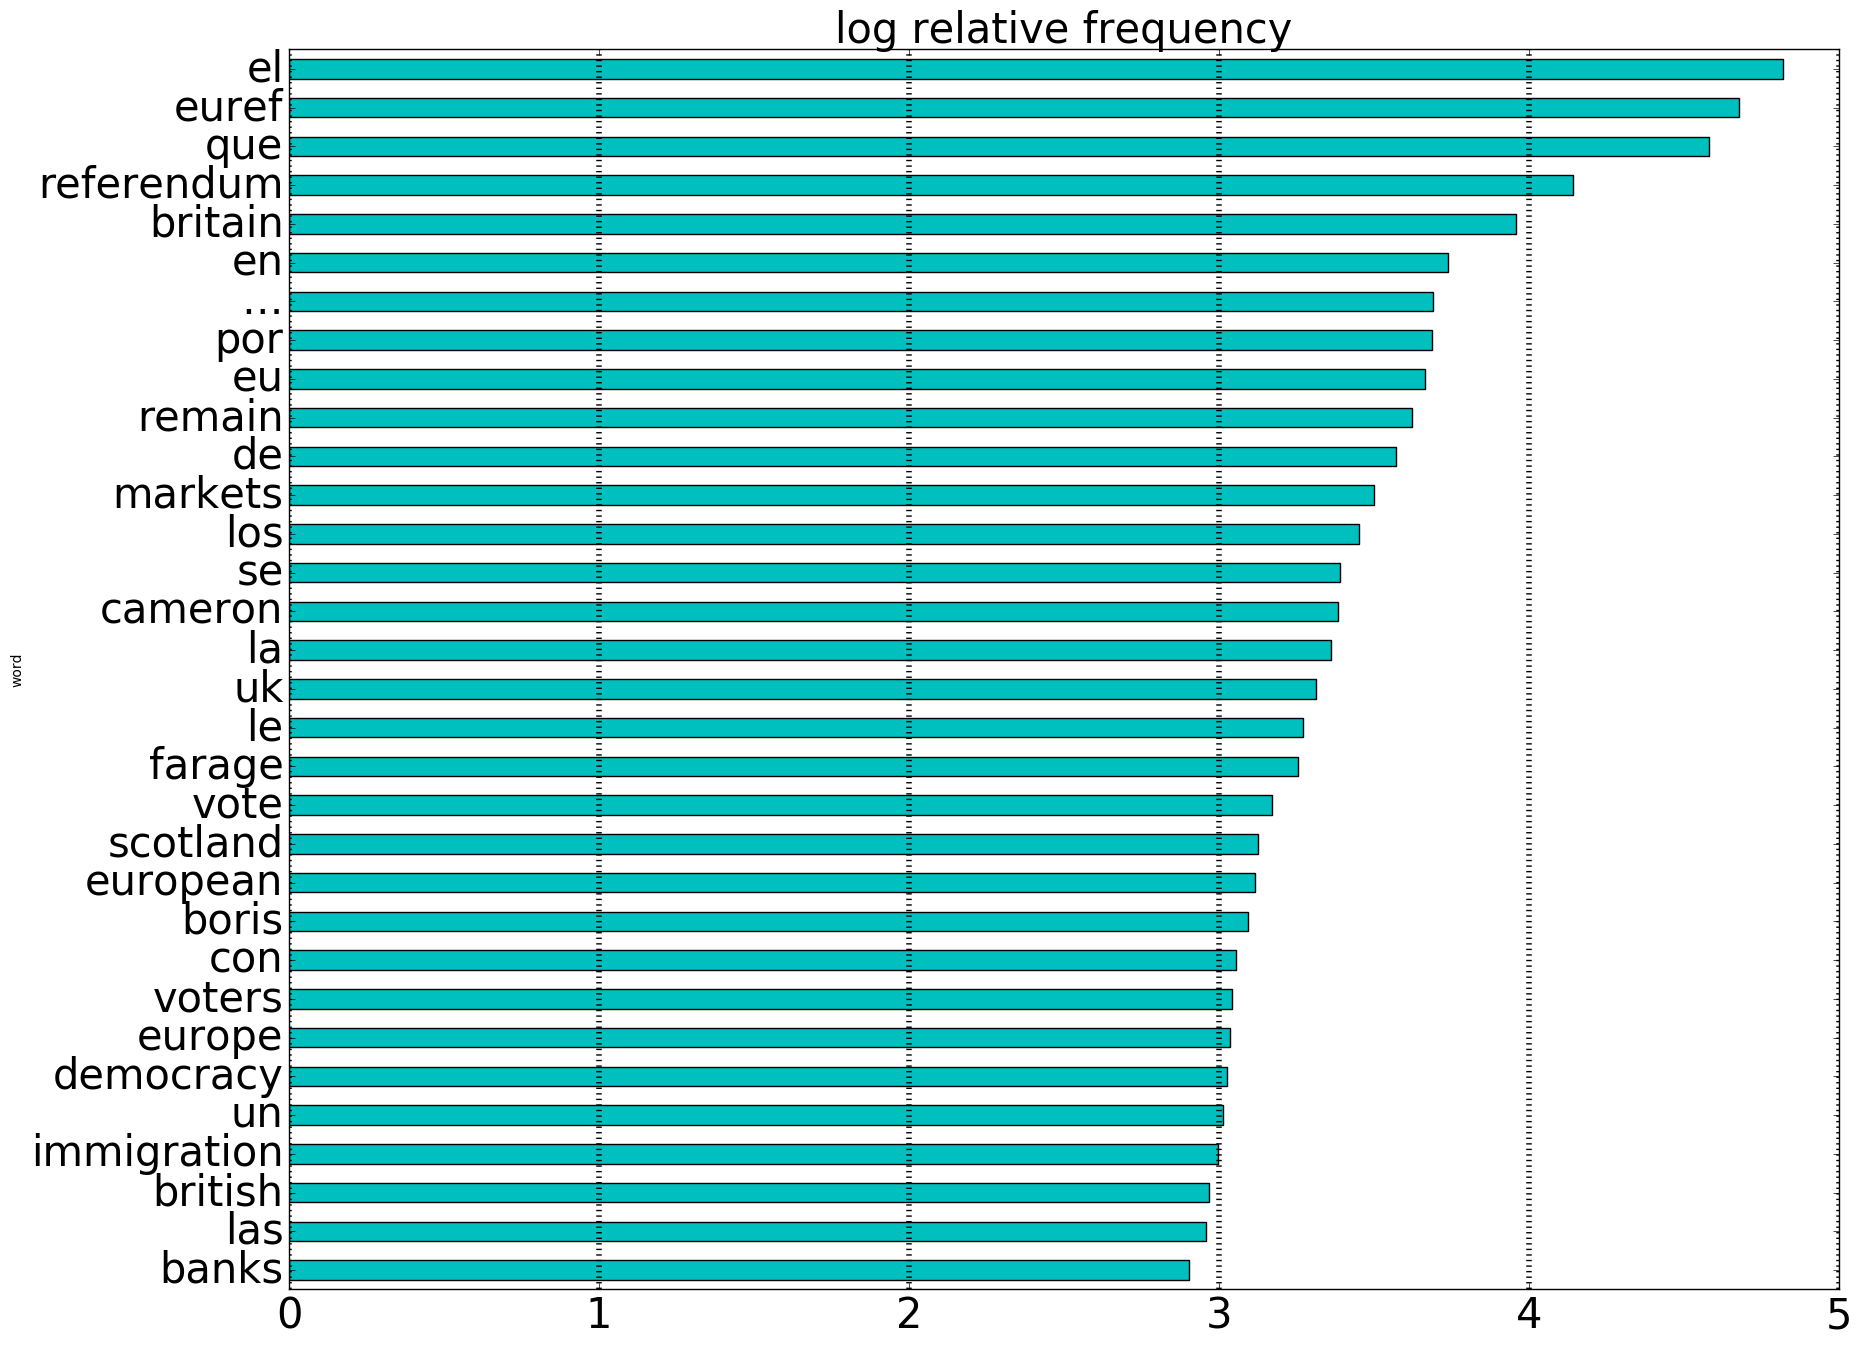

In [43]:
num_words_to_plot = 32
background_cutoff = 2000
twit.word_freq_df[twit.word_freq_df["background_occur"]>background_cutoff].sort_values("log relative frequency", ascending=True).set_index("word")["log relative frequency"][-num_words_to_plot:].plot.barh(figsize=(20,
                num_words_to_plot/2.), fontsize=30, color="c"); 
plt.title("log relative frequency", fontsize=30); 
ax = plt.axes();        
ax.xaxis.grid(linewidth=4);